In [32]:
import torch
from torch.utils.data import Dataset,DataLoader,SequentialSampler,RandomSampler,BatchSampler,default_collate
import matplotlib.pyplot as plt
from torch.nn import Linear
from torch import optim,nn
import numpy as np
from torch import manual_seed

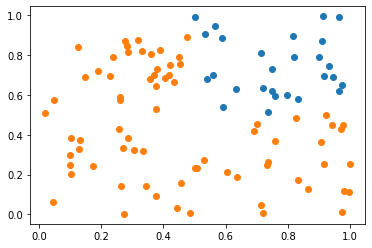

In [33]:
x = np.random.rand(100,2).astype(np.float32)
x1=np.all(x>0.5,axis=1)
x2=np.where(x1==False)
plt.scatter(x[x1][:,0],x[x1][:,1])
plt.scatter(x[x2][:,0],x[x2][:,1])

In [34]:
class dataset(Dataset):
    def __init__(self):
        self.datapoints= np.random.rand(100,2).astype(np.float32)

    def __getitem__(self, index):
        if(self.datapoints[index][0]>0.5 and self.datapoints[index][1]>0.5):
            class_name=torch.tensor(1,dtype=torch.float32)
        else:
            class_name=torch.tensor(0,dtype=torch.float32)
        return [self.datapoints[index],class_name]
    def __len__(self):
        return len(self.datapoints)


        

In [35]:
batch_size=1
data_set=dataset()
train_dataloader=DataLoader(data_set,batch_size)


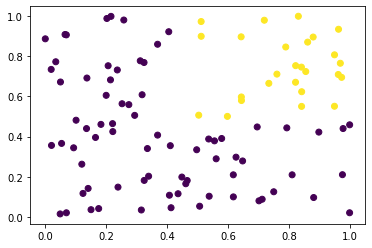

In [36]:
plt.scatter(data_set.datapoints[:, :1], data_set.datapoints[:,1:], c=np.all(data_set.datapoints>0.5, 1).astype(np.uint8))

In [37]:
data_set[10]

[array([0.13778862, 0.6917748 ], dtype=float32), tensor(0.)]

In [38]:
class LR(nn.Module):
    def __init__(self,activation):
        super().__init__()
        self.input_features = 2
        self.hidden_features = 4
        self.output_features = 1   
        self.activation = activation

        self.linear_1=nn.Linear(self.input_features,self.hidden_features)
        self.linear_2=nn.Linear(self.hidden_features,self.output_features)
        self.sig=nn.Sigmoid()
        self.relu=nn.ReLU()
    def forward(self,x):
        if(self.activation):
            out=self.linear_2(self.sig(self.linear_1(x)))
            
        else:
            x=self.linear_1(x)
            out=self.linear_2(x)
        
        return self.sig(out)
        


In [39]:
criteria=nn.MSELoss()

In [40]:
# manual_seed(1)

# linear=LR(activation=True)

# SGD=optim.SGD(linear.parameters(),0.001)

# train_loss=[]
# y_hatlist=[]

# def linear_nn(linear,train_dataloader,SGD,criteria):
#     for epoch in range(10000):
#         for x,y in train_dataloader:
#             y_hat=linear(x)
#             y_hatlist.append(y_hat)
#             loss=criteria(y_hat,y)
#             SGD.zero_grad()
#             loss.backward()
#             SGD.step()
#         print(f"for epoch {epoch} | train_loss :: {loss}".format(epoch,loss))
#         train_loss.append(loss.detach().numpy())
    
#     return linear,train_loss,y_hatlist

# linear.state_dict()


In [41]:
manual_seed(1)

linear=LR(activation=False)


train_loss=[]
y_hatlist=[]

In [42]:
SGD=optim.SGD(linear.parameters(),0.1)

In [43]:
for epoch in range(1000):
    for x,y in train_dataloader:
        y_hat=linear(x)
        y_hatlist.append(y_hat)
        loss=criteria(y_hat.view(-1),y)
        SGD.zero_grad()
        loss.backward()
        SGD.step()
    print(f"for epoch {epoch} | train_loss :: {loss}".format(epoch,loss))
    train_loss.append(loss.detach().numpy())

for epoch 0 | train_loss :: 0.4431527853012085
for epoch 1 | train_loss :: 0.4971056580543518
for epoch 2 | train_loss :: 0.502388060092926
for epoch 3 | train_loss :: 0.4790676534175873
for epoch 4 | train_loss :: 0.4278641939163208
for epoch 5 | train_loss :: 0.35943904519081116
for epoch 6 | train_loss :: 0.29670265316963196
for epoch 7 | train_loss :: 0.2554394006729126
for epoch 8 | train_loss :: 0.23536883294582367
for epoch 9 | train_loss :: 0.2282865345478058
for epoch 10 | train_loss :: 0.22764529287815094
for epoch 11 | train_loss :: 0.2299163043498993
for epoch 12 | train_loss :: 0.23342551290988922
for epoch 13 | train_loss :: 0.23741619288921356
for epoch 14 | train_loss :: 0.24155457317829132
for epoch 15 | train_loss :: 0.24569621682167053
for epoch 16 | train_loss :: 0.24977777898311615
for epoch 17 | train_loss :: 0.25377196073532104
for epoch 18 | train_loss :: 0.2576669752597809
for epoch 19 | train_loss :: 0.2614581882953644
for epoch 20 | train_loss :: 0.2651424705

In [44]:
# predicted,loss_list,y_hatlist=linear_nn(linear,train_dataloader,SGD,criteria)

In [45]:
test_x=torch.tensor([1.0,0.],dtype=torch.float32)
print(linear(test_x))

tensor([0.0642], grad_fn=<SigmoidBackward0>)


(50,)
(50,)


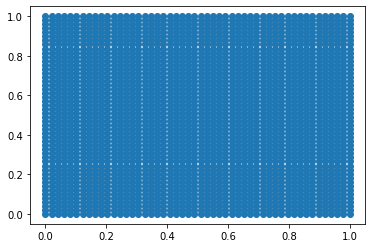

In [46]:
x=np.linspace(0,1)
y=np.linspace(0,1)
print(x.shape)
print(y.shape)
tx,ty=np.meshgrid(x,y)
plt.scatter(tx,ty)



In [47]:

tx=tx.reshape(( 1,2500))
ty=ty.reshape(( 1,2500))
data_points=np.append(tx,ty,axis=0)
print(data_points.shape)

zipped=zip(data_points[0,:],data_points[1,:])
array=np.array(list(zipped))
print(array[:,0])


(2, 2500)
[0.         0.02040816 0.04081633 ... 0.95918367 0.97959184 1.        ]


(2500, 2)

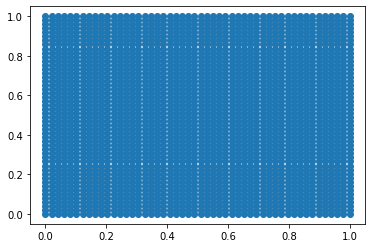

In [48]:
plt.scatter(array[:,0],array[:,1])
array.shape

In [49]:
test=torch.tensor(array,dtype=torch.float32)
linear(test)

tensor([[6.0558e-06],
        [7.3267e-06],
        [8.8642e-06],
        ...,
        [9.9779e-01],
        [9.9818e-01],
        [9.9849e-01]], grad_fn=<SigmoidBackward0>)

In [50]:
test.shape

torch.Size([2500, 2])

In [51]:
array[1000]

array([0.        , 0.40816327])

In [52]:
(np.all(data_set.datapoints>0.5, 1).astype(np.uint8)== (linear(torch.as_tensor(data_set.datapoints))>0.5).view(-1).detach().numpy().astype(np.uint8)).sum()

92

In [53]:

predict=linear(test).detach().numpy()
len(predict)

2500

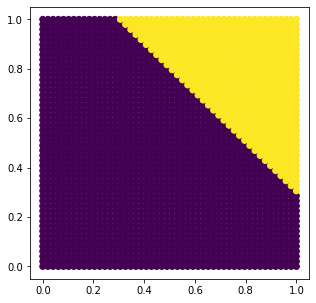

In [54]:
plt.figure(figsize=(5,5))

plt.scatter(array[:,0],array[:,1], c=(predict>0.5).astype(np.uint8))
# plt.plot(predict,cmap="gray")

In [55]:
manual_seed(1)

linear=LR(activation=True)


train_loss=[]
y_hatlist=[]

In [56]:
SGD=optim.SGD(linear.parameters(),0.1)

In [57]:
for epoch in range(1000):
    for x,y in train_dataloader:
        y_hat=linear(x)
        y_hatlist.append(y_hat)
        loss=criteria(y_hat.view(-1),y)
        SGD.zero_grad()
        loss.backward()
        SGD.step()
    print(f"for epoch {epoch} | train_loss :: {loss}".format(epoch,loss))
    train_loss.append(loss.detach().numpy())

for epoch 0 | train_loss :: 0.5049923658370972
for epoch 1 | train_loss :: 0.5379197597503662
for epoch 2 | train_loss :: 0.5436407327651978
for epoch 3 | train_loss :: 0.5442606210708618
for epoch 4 | train_loss :: 0.5437204241752625
for epoch 5 | train_loss :: 0.5427846908569336
for epoch 6 | train_loss :: 0.5415781736373901
for epoch 7 | train_loss :: 0.540091335773468
for epoch 8 | train_loss :: 0.5382866859436035
for epoch 9 | train_loss :: 0.5361222624778748
for epoch 10 | train_loss :: 0.5335584878921509
for epoch 11 | train_loss :: 0.5305605530738831
for epoch 12 | train_loss :: 0.5271012187004089
for epoch 13 | train_loss :: 0.5231614112854004
for epoch 14 | train_loss :: 0.518730878829956
for epoch 15 | train_loss :: 0.51380854845047
for epoch 16 | train_loss :: 0.5084003806114197
for epoch 17 | train_loss :: 0.5025190711021423
for epoch 18 | train_loss :: 0.49618247151374817
for epoch 19 | train_loss :: 0.4894131124019623
for epoch 20 | train_loss :: 0.482237309217453
for ep

In [58]:

predict=linear(test).detach().numpy()
len(predict)

2500

In [59]:
predic=linear(test)

In [60]:

tx=tx.reshape(( 1,2500))
ty=ty.reshape(( 1,2500))
data_points=np.append(tx,ty,axis=0)
print(data_points.shape)

zipped=zip(data_points[0,:],data_points[1,:])
array=np.array(list(zipped))
print(array[:,0])


(2, 2500)
[0.         0.02040816 0.04081633 ... 0.95918367 0.97959184 1.        ]


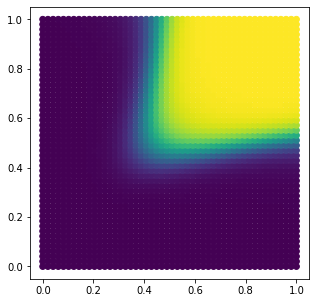

In [61]:
plt.figure(figsize=(5,5))

plt.scatter(array[:,0],array[:,1], c=predict)

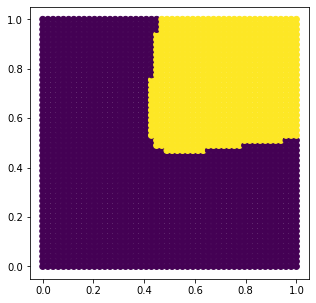

In [62]:
plt.figure(figsize=(5,5))

plt.scatter(array[:,0],array[:,1], c=(predict>0.5).astype(np.uint8))